In [1]:
#analysis and scraping
import pandas as pd
import requests
from bs4 import BeautifulSoup
from string import ascii_lowercase
import json 

#path handling
import os

## plotting libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches
import pandas as pd
from matplotlib import font_manager

In [2]:
# set working directory
root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Scraping

## Scrape from Google Suggest

In [18]:
#Input
seed_kw = ["why do cyclists", "why are cyclists", "why is cycling", "why does cycling"]
country = "uk" 

#output
data = {"Cyclists behaviour": [],"Cyclists traits": [],"Cycling is": [], "Cycling does" : []}

In [19]:
for i in range(len(seed_kw)):

    #convert seed keyword to list
    keywords = [seed_kw[i]]

    #create additional seed by appending a-z & 0-9 to it
    for c in ascii_lowercase:
        keywords.append(seed_kw[i]+' '+c)
    for n in range(0,10):
        keywords.append(seed_kw[i]+' '+str(n))

    #get all suggestions from Google
    for kw in keywords:
        r = requests.get('http://suggestqueries.google.com/complete/search?output=toolbar&hl={}&q={}'.format(country,kw))
        soup = BeautifulSoup(r.content, 'html.parser')
        sugg = [sugg['data'] for sugg in soup.find_all('suggestion')]
        data[list(data.keys())[i]].extend(sugg)

In [31]:
#how many suggestions per keyword
for d in data:
    print(d,":", len(data[d]))

Cyclists behaviour : 222
Cyclists traits : 165
Cycling is : 166
Cycling does : 161


## Scrape from Google Search Trends

In [3]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-UK', tz=360)

In [7]:
pytrends.build_payload(kw_list=['Taylor Swift'])# Interest by Region
df = pytrends.interest_by_region()
df.head(10)

,Taylor Swift
geoName,
Afghanistan,0
Albania,0
Algeria,0
American Samoa,0
Andorra,0
Angola,0
Anguilla,0
Antarctica,0
Antigua & Barbuda,0


In [25]:
kw_list=["cycling", "driving"]
kw_list=["cycling", "driving"]

pytrends.build_payload(kw_list, cat=0, geo='GB', timeframe='2019-01-01 2021-12-31') 

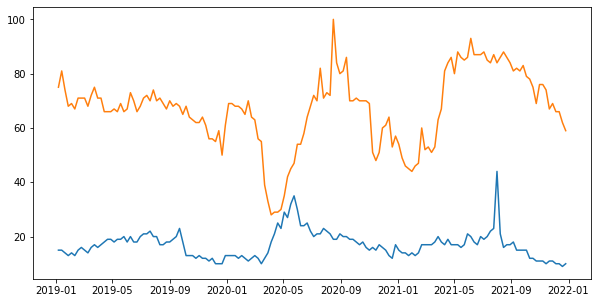

In [32]:
kw_list=["cycling", "driving"]

pytrends.build_payload(kw_list, cat=0, geo='GB', timeframe='2019-01-01 2021-12-31') 

#1 Interest over Time
data = pytrends.interest_over_time() 
data = data.reset_index() 

#plot lines
fig, ax = plt.subplots(figsize=(10,5))

plt.plot(data["date"], data["cycling"])
plt.plot(data["date"], data["driving"])

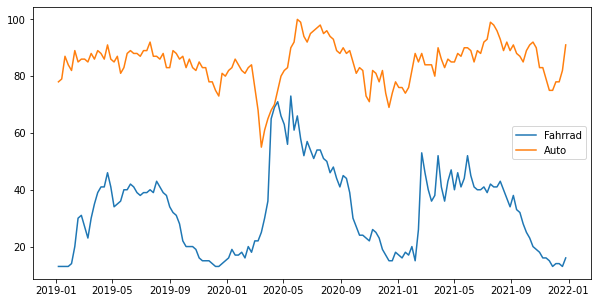

In [48]:
kw_list=["Fahrrad", "Auto"]

pytrends.build_payload(kw_list, cat=0, geo='DE', timeframe='2019-01-01 2021-12-31') 

#1 Interest over Time
data = pytrends.interest_over_time() 
data = data.reset_index() 

#plot lines
fig, ax = plt.subplots(figsize=(10,5))

for kw in kw_list:
    plt.plot(data["date"], data[kw], label=kw)
    
plt.legend()

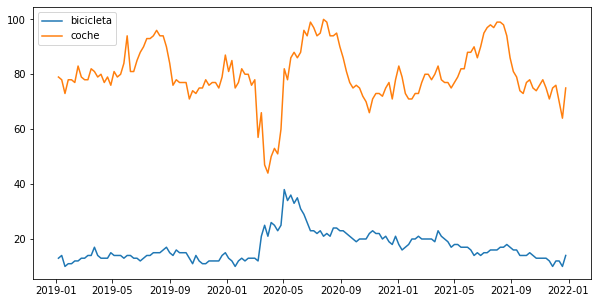

In [51]:
kw_list=["bicicleta", "coche"]

pytrends.build_payload(kw_list, cat=0, geo='ES', timeframe='2019-01-01 2021-12-31') 

#1 Interest over Time
data = pytrends.interest_over_time() 
data = data.reset_index() 

#plot lines
fig, ax = plt.subplots(figsize=(10,5))

for kw in kw_list:
    plt.plot(data["date"], data[kw], label=kw)
    
plt.legend()

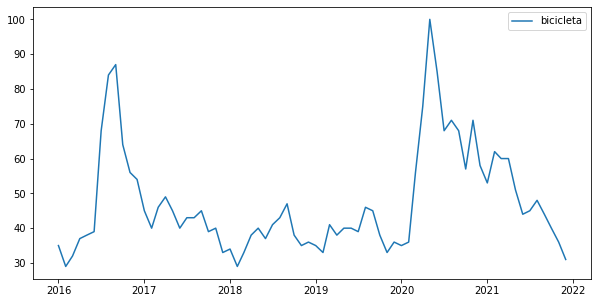

In [52]:
kw_list=["bicicleta"]

pytrends.build_payload(kw_list, cat=0, geo='ES', timeframe='2016-01-01 2021-12-31') 

#1 Interest over Time
data = pytrends.interest_over_time() 
data = data.reset_index() 

#plot lines
fig, ax = plt.subplots(figsize=(10,5))

for kw in kw_list:
    plt.plot(data["date"], data[kw], label=kw)
    
plt.legend()

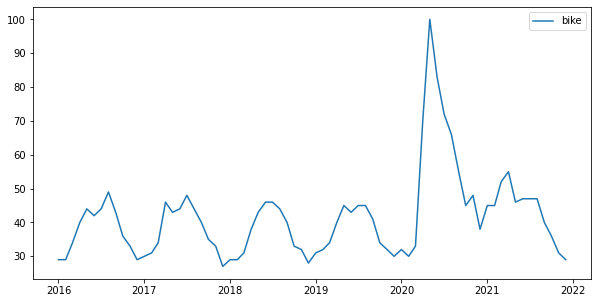

In [53]:
kw_list=["bike"]

pytrends.build_payload(kw_list, cat=0, geo='GB', timeframe='2016-01-01 2021-12-31') 

#1 Interest over Time
data = pytrends.interest_over_time() 
data = data.reset_index() 

#plot lines
fig, ax = plt.subplots(figsize=(10,5))

for kw in kw_list:
    plt.plot(data["date"], data[kw], label=kw)
    
plt.legend()

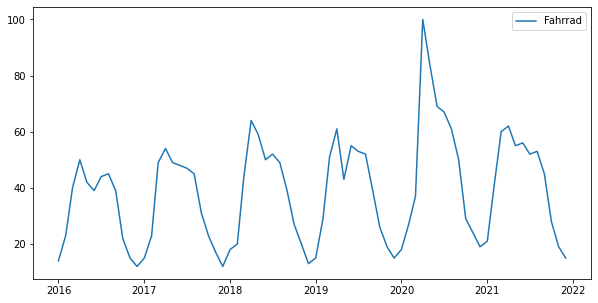

In [57]:
kw_list=["Fahrrad"]

pytrends.build_payload(kw_list, cat=0, geo='AT', timeframe='2016-01-01 2021-12-31') 

#1 Interest over Time
data = pytrends.interest_over_time() 
data = data.reset_index() 

#plot lines
fig, ax = plt.subplots(figsize=(10,5))

for kw in kw_list:
    plt.plot(data["date"], data[kw], label=kw)
    
plt.legend()

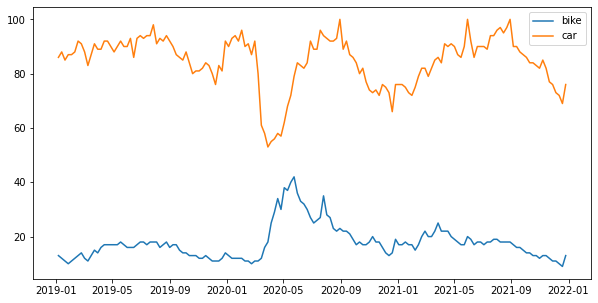

In [49]:
kw_list=["bike", "car"]

pytrends.build_payload(kw_list, cat=0, geo='GB', timeframe='2019-01-01 2021-12-31') 

#1 Interest over Time
data = pytrends.interest_over_time() 
data = data.reset_index() 

#plot lines
fig, ax = plt.subplots(figsize=(10,5))

for kw in kw_list:
    plt.plot(data["date"], data[kw], label=kw)
    
plt.legend()

In [66]:
kw_list = {"GB": ["bike"], "DE": ["Fahrrad"], "ES": ["bicicleta"], "NL": ["fiets"]}

data = {}

for country in list(kw_list.keys()):
    pytrends.build_payload(kw_list[country], cat=0, geo=country, timeframe='2019-01-01 2021-12-31') 
    data[country] = pytrends.interest_over_time() 

data

{'GB':             bike  isPartial
 date                       
 2019-01-06    31      False
 2019-01-13    28      False
 2019-01-20    26      False
 2019-01-27    25      False
 2019-02-03    26      False
 ...          ...        ...
 2021-11-28    26      False
 2021-12-05    25      False
 2021-12-12    24      False
 2021-12-19    22      False
 2021-12-26    30      False
 
 [156 rows x 2 columns],
 'DE':             Fahrrad  isPartial
 date                          
 2019-01-06       18      False
 2019-01-13       18      False
 2019-01-20       18      False
 2019-01-27       18      False
 2019-02-03       20      False
 ...             ...        ...
 2021-11-28       18      False
 2021-12-05       19      False
 2021-12-12       19      False
 2021-12-19       18      False
 2021-12-26       22      False
 
 [156 rows x 2 columns],
 'ES':             bicicleta  isPartial
 date                            
 2019-01-06         34      False
 2019-01-13         36      False